## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. 3D Model

### Importing libraries and data and renaming columns

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [153]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [154]:
# Create path
path = r"C:\Users\TN1\Desktop\career foundry\2 Data Immersion\6\DE vehicle price efficiency"

In [155]:
# Import the DEAutos data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'DEautos_wrangled.csv'))


In [156]:
df.shape

(500, 10)

In [157]:
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg


### 2. The elbow technique

In [159]:
# Create a subset containing only numerical variables
df_numerical = df.drop(columns=['Brand', 'Model', 'Transmission', 'City', 'Fuel Type'])

In [160]:
df_numerical

,Year,Mileage,Fuel Consumption (L/100km),Horsepower (HP),Price
0,2006,260886,9.5,213,12063.27
1,2015,72505,6.5,335,33890.58
2,2007,125356,9.9,445,92639.12
3,2009,130867,4.1,165,88003.50
4,2022,57482,5.2,145,26028.97
...,...,...,...,...,...
495,2022,116092,8.0,76,88718.55
496,2018,107863,9.8,284,28997.99
497,2022,236821,9.5,98,37530.18
498,2014,81406,11.3,330,37858.01


In [161]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [162]:
import os
os.environ["OMP_NUM_THREADS"] = "2"


In [163]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [164]:
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4066378305192.0195,
 -1256035415471.4834,
 -830771746588.8894,
 -612843975743.1075,
 -516684940332.9618,
 -428966659267.1841,
 -367546510611.49396,
 -315409638531.9139,
 -295903767342.95245]

In [165]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Now, run your code
from sklearn.cluster import KMeans

kmeans = [KMeans(n_clusters=i, n_init='auto', random_state=42) for i in range(1, 11)]
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))]


In [166]:
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4066378305192.0195,
 -1256035415471.4834,
 -832825194727.1719,
 -613074459472.3665,
 -526378075423.23035,
 -451333715413.861,
 -361085195424.6205,
 -307644735235.35767,
 -250281733331.55408,
 -223578568162.04834]

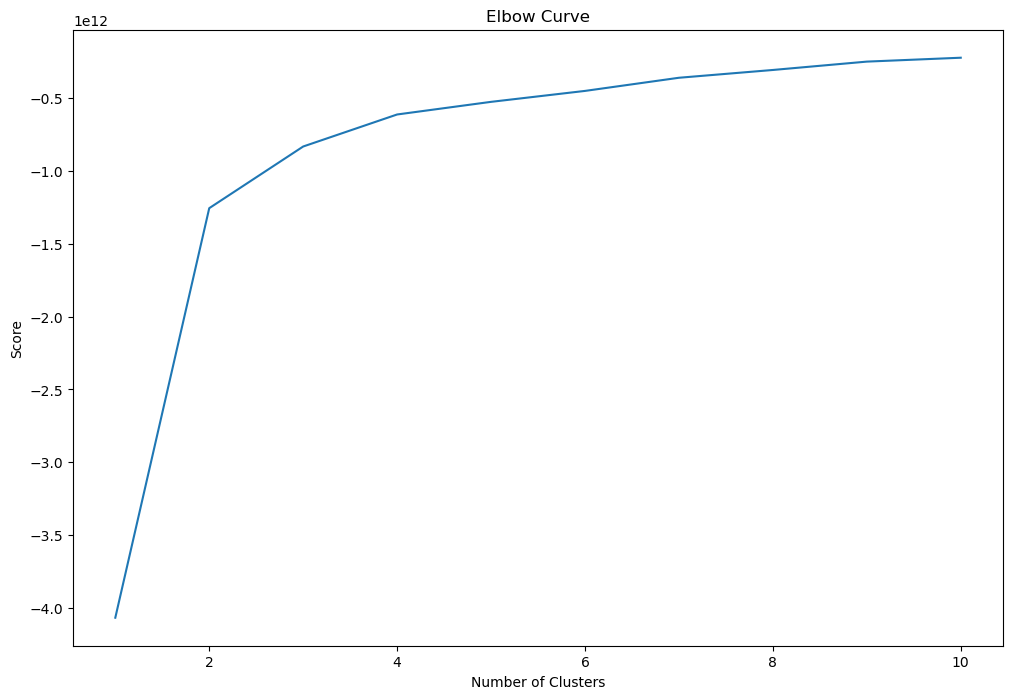

In [167]:

import matplotlib.pyplot as plt

# Assuming num_cl is the range of cluster numbers (e.g., 1 to 10)
num_cl = list(range(1, 11))  # Numbers from 1 to 10

# Assuming score is generated for each number of clusters
# For example, using KMeans to generate scores for each number of clusters
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(num_cl))]

# Now plot the elbow curve
plt.plot(num_cl, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


#####  In this example, there's a large jump from 1 to 2 on the x-axis, but after that, the curve inclines slightly. Especially the curve after 4 is almost flat. This means that the optimal count for your clusters is 4.

### 3. k-means clustering

In [170]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [171]:
# Fit the k-means object to the data.

kmeans.fit(df_numerical)

KMeans(n_clusters=4)

In [172]:
df_numerical['clusters'] = kmeans.fit_predict(df_numerical)

In [173]:
df_numerical.head()

,Year,Mileage,Fuel Consumption (L/100km),Horsepower (HP),Price,clusters
0,2006,260886,9.5,213,12063.27,0
1,2015,72505,6.5,335,33890.58,2
2,2007,125356,9.9,445,92639.12,1
3,2009,130867,4.1,165,88003.50,1
4,2022,57482,5.2,145,26028.97,2


In [174]:
df_numerical['clusters'].value_counts()

clusters
0    143
1    123
2    117
3    117
Name: count, dtype: int64

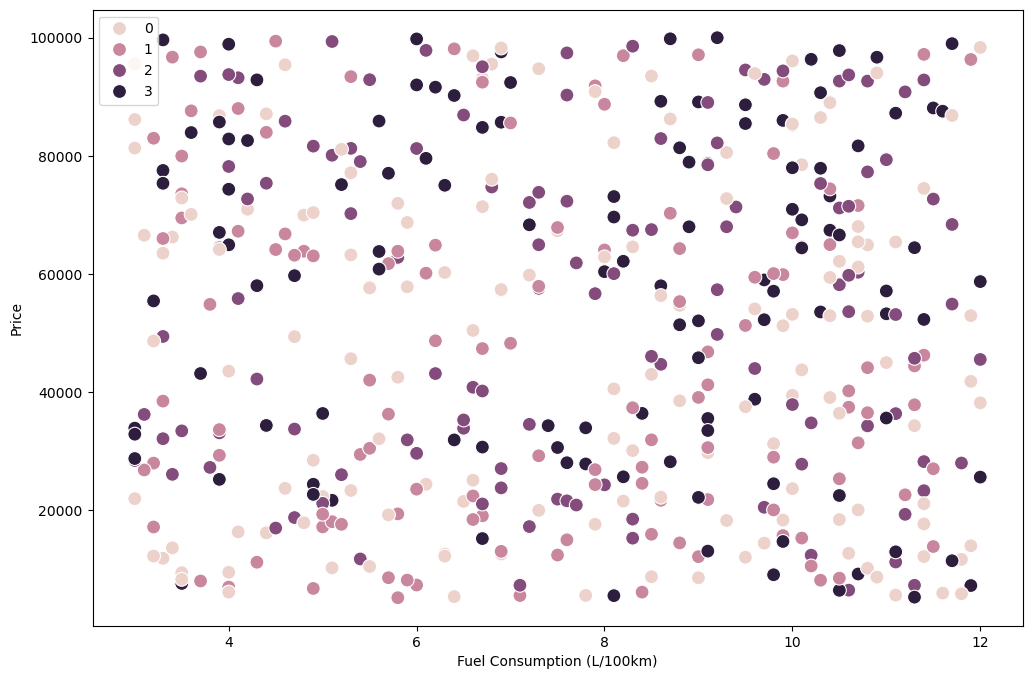

In [217]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['Fuel Consumption (L/100km)'], y=df_numerical['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Fuel Consumption (L/100km)') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

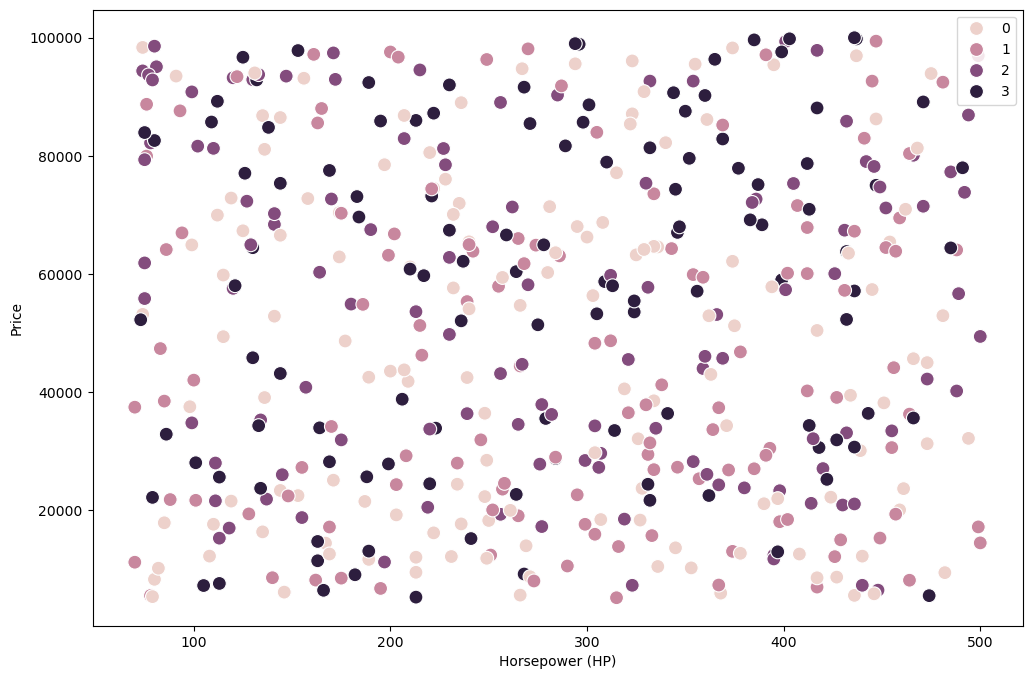

In [215]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['Horsepower (HP)'], y=df_numerical['Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Horsepower (HP)') 
plt.ylabel('Price') 
plt.show()

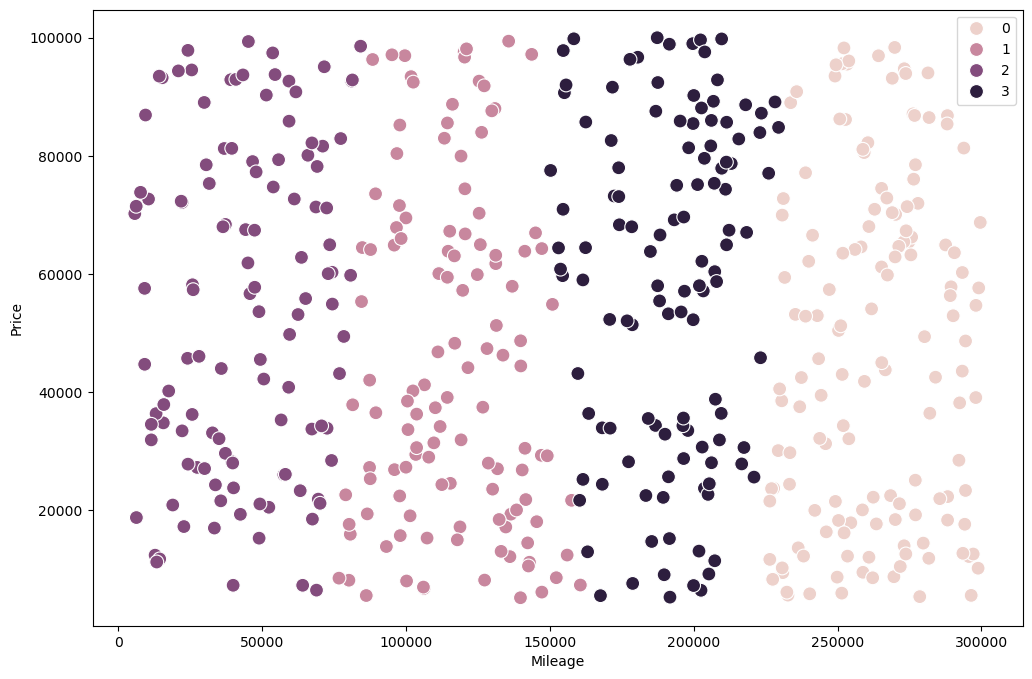

In [177]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['Mileage'], y=df_numerical['Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Mileage') 
plt.ylabel('Price') 
plt.show()

In [178]:
df_numerical.loc[df_numerical['clusters'] == 2, 'cluster'] = 'dark purple'
df_numerical.loc[df_numerical['clusters'] == 1, 'cluster'] = 'purple'
df_numerical.loc[df_numerical['clusters'] == 0, 'cluster'] = 'pink'

In [179]:
df_numerical.groupby('cluster').agg({'Fuel Consumption (L/100km)':['mean', 'median'], 
                         'Horsepower (HP)':['mean', 'median'], 
                         'Mileage':['mean', 'median'],
                          'Price':['mean', 'median']})

Fuel Consumption (L/100km)        Horsepower (HP)         \
                                  mean median            mean median   
cluster                                                                
dark purple                   7.759829    7.6      278.615385  277.0   
pink                          7.632168    7.9      277.300699  267.0   
purple                        7.281301    7.3      293.333333  299.0   

                   Mileage                   Price            
                      mean    median          mean    median  
cluster                                                       
dark purple   43886.581197   44181.0  54769.758376  56667.92  
pink         262775.986014  262855.0  47161.895944  45660.41  
purple       116244.162602  116092.0  45464.731301  39106.77

## Commentation
#### Due to the data kmeans analysis does not make sense. It may be caused by the limited data points of 500. With a larger dataset it can work better.
#### Descriptive analysis 
#### Judging by these statistics, you can state a few facts:

##### The dark purple cluster has the highest fuel consumption, mediocre horse power,lowest mileage but has the highest price.
##### The pink cluster has mediocre fuel consumption, lowest horsepowerge, highest mileage and has second highest price.
##### The purple cluster has the lowest fuel consumption, highest horsepower, mediocre mileage and lowest price.

In [231]:
# Final check of the "merged_data" dataframe before exporting
print(df_numerical.head())
print(df_numerical.info())
df_numerical.shape

   Year  Mileage  Fuel Consumption (L/100km)  Horsepower (HP)     Price  \
0  2006   260886                         9.5              213  12063.27   
1  2015    72505                         6.5              335  33890.58   
2  2007   125356                         9.9              445  92639.12   
3  2009   130867                         4.1              165  88003.50   
4  2022    57482                         5.2              145  26028.97   

   clusters      cluster  
0         0         pink  
1         2  dark purple  
2         1       purple  
3         1       purple  
4         2  dark purple  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        500 non-null    int64  
 1   Mileage                     500 non-null    int64  
 2   Fuel Consumption (L/100km)  500 non-null    float6

(500, 7)

In [233]:
# Export the "df_cov_19" dataframe to CSV
df_numerical.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'DEAutos_numericaldata.csv'), index=False)

# Additional Work for 3D

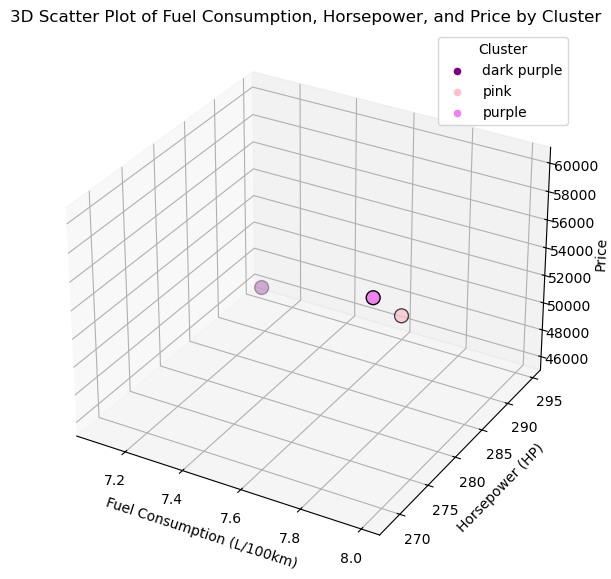

In [235]:
# Normal 3D Modelling
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Create a DataFrame with the given data
data = {
    'Fuel Consumption (L/100km)': [7.093548, 7.853175, 7.993694],
    'Horsepower (HP)': [294.645161, 280.992063, 268.432432],
    'Price': [46026.950726, 53451.756587, 60074.772342],
    'Cluster': ['dark purple', 'pink', 'purple']
}

df = pd.DataFrame(data)

# Map clusters to colors for better visualization
color_map = {'dark purple': 'purple', 'pink': 'pink', 'purple': 'violet'}
df['Color'] = df['Cluster'].map(color_map)

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting data points
scatter = ax.scatter(df['Fuel Consumption (L/100km)'], df['Horsepower (HP)'], df['Price'], 
           c=df['Color'], s=100, edgecolor='k')

# Adding labels and title
ax.set_xlabel('Fuel Consumption (L/100km)')
ax.set_ylabel('Horsepower (HP)')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Fuel Consumption, Horsepower, and Price by Cluster')

# Add a custom legend
legend_labels = ['dark purple', 'pink', 'purple']
for label, color in color_map.items():
    ax.scatter([], [], color=color, label=label)

ax.legend(title='Cluster')

# Show plot
plt.show()


## Normal 3D Modelling Trial

#### The three dots in the plot represent the three clusters (dark purple, pink, purple) from your dataset. Plotting data for three different clusters, each dot corresponds to the mean values of the attributes (Fuel Consumption, Horsepower, and Price) for each of the clusters.


#### Dark Purple Cluster:

#### Mean values: 
##### Fuel Consumption: 7.093548 L/100km 
##### Horsepower: 294.645161 
##### HP Price: 46026.950726

#### Pink Cluster: 
#### Mean values: 
##### Fuel Consumption: 7.853175 L/100km 
##### Horsepower: 280.992063 
##### HP Price: 53451.756587

#### Purple Cluster: 
#### Mean values: 
##### Fuel Consumption: 7.993694 L/100km 
##### Horsepower: 268.432432 
##### HP Price: 60074.772342

### The three colored circles represent the three clusters that have been identified using the K-means clustering algorithm, based on the following features:

#### Fuel Consumption (L/100km), Horsepower (HP), Price
#### Each color represents a distinct cluster, and each cluster groups data points that are similar to one another in these three features.

#### Definitions for Each Colored Circle:
#### Purple Circle (Represents the "dark purple" cluster):

#### Cluster Definition: This cluster consists of data points that have:
#### Higher Fuel Consumption: These vehicles tend to consume more fuel, which may indicate less fuel-efficient vehicles.
#### Higher Horsepower (HP): Vehicles in this cluster generally have higher horsepower, suggesting they may be more powerful or performance-oriented cars.
#### Moderate Price: These vehicles have a moderate price, possibly indicating that they are mid-range vehicles in terms of performance and features.
#### Interpretation: The purple circle represents a group of high-performance, moderately priced vehicles with higher fuel consumption.

#### Pink Circle (Represents the "pink" cluster):

#### Cluster Definition: Data points in this cluster have:
#### Moderate Fuel Consumption: Vehicles in this cluster exhibit an intermediate level of fuel consumption, neither too high nor too low.
#### Moderate Horsepower (HP): These vehicles have mid-range horsepower, suggesting a balance between performance and efficiency.
#### Moderate Price: The vehicles in this cluster fall within a middle price range, likely representing affordable and balanced vehicles.
#### Interpretation: The pink circle represents a group of balanced, moderately priced vehicles with moderate performance and fuel consumption.

#### Violet Circle (Represents the "purple" cluster):

#### Cluster Definition: This cluster is characterized by:
#### Lower Fuel Consumption: These vehicles are generally more fuel-efficient, likely indicating eco-friendly or smaller cars.
#### Lower Horsepower (HP): The vehicles in this cluster tend to have lower horsepower, which may indicate more economy-oriented or compact vehicles.
#### Higher Price: Despite the lower horsepower and fuel consumption, these vehicles are often priced higher, possibly because of advanced features, technology, or eco-friendly characteristics.
#### Interpretation: The violet circle represents a group of fuel-efficient, higher-priced vehicles, possibly eco-friendly or premium compact vehicles.

### Summary:
#### Purple Circle: High-performance, moderately priced vehicles with higher fuel consumption.
#### Pink Circle: Balanced vehicles with moderate performance, price, and fuel consumption.
#### Violet Circle: Fuel-efficient, higher-priced vehicles with lower horsepower.
#### These clusters provide insight into the distribution of vehicles based on their performance (horsepower), price, and fuel efficiency. The colors in the 3D scatter plot visually separate these groups, allowing you to see how the vehicles in each group compare across these three features.

### From this 3D Model Moderate and Low Clasifications price range are closer to each other than higher clasification.






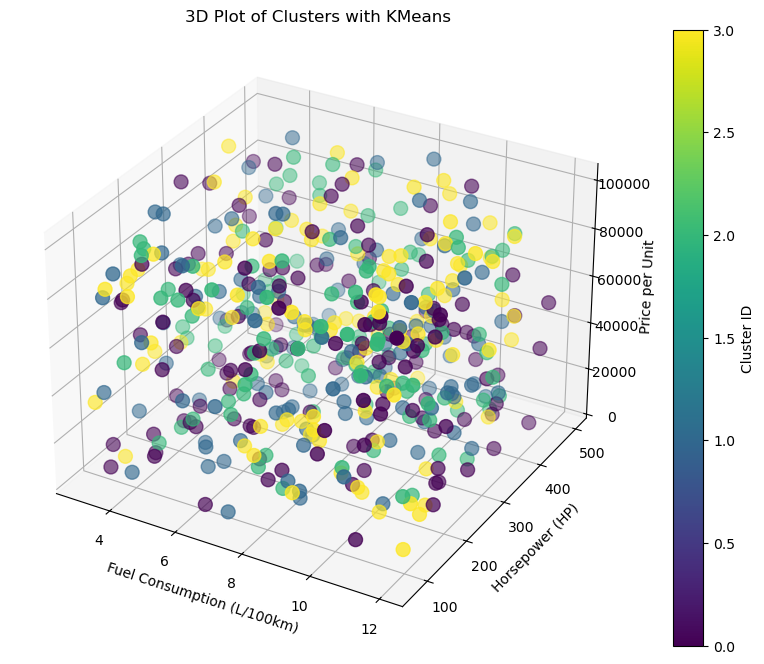

In [239]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming df_numerical is your DataFrame and kmeans.labels_ contains the cluster labels

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with KMeans clusters
scatter = ax.scatter(df_numerical['Fuel Consumption (L/100km)'], 
                     df_numerical['Horsepower (HP)'],  # Now on Y-axis
                     df_numerical['Price'],            # Now on Z-axis
                     c=kmeans.labels_, cmap='viridis', s=100)

# Labels and title
ax.set_xlabel('Fuel Consumption (L/100km)')
ax.set_ylabel('Horsepower (HP)')  # Changed to Horsepower (HP)
ax.set_zlabel('Price per Unit')   # Changed to Price per Unit
ax.set_title('3D Plot of Clusters with KMeans')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster ID')

# Show the plot
plt.show()


In [241]:
# The 6 different colored circles you see in the 3D plot represent the KMeans clusters. Each circle corresponds to a group of data points that have been classified into a specific cluster based on the similarity of their attributes: Fuel Consumption (L/100km), Horsepower (HP), and Price per Unit. Here’s a detailed explanation of the plot:

# 1. KMeans Clustering Overview:
# KMeans is a popular machine learning algorithm used to group data into clusters (or segments). The algorithm attempts to partition data into a predefined number of clusters (in this case, 6 clusters), where the points in each cluster are as similar as possible to each other and as different as possible from the points in other clusters.

# Cluster: A collection of similar data points. KMeans uses the concept of a "centroid," which is the center of each cluster, and assigns each data point to the cluster whose centroid is nearest.

# 2. Axes Explanation:
# X-axis: Fuel Consumption (L/100km) – This shows how much fuel the cars consume per 100 kilometers traveled. Lower values suggest more fuel-efficient cars, while higher values indicate less fuel-efficient cars.
# Y-axis: Horsepower (HP) – This represents the power of the engine. Higher values indicate more powerful engines, while lower values suggest less powerful engines.
# Z-axis: Price per Unit – This shows the price of the cars. Higher values suggest more expensive cars, while lower values indicate more affordable ones.

# 3. What the Colored Circles Represent:
# Each of the 6 different colored circles represents one of the 6 clusters that KMeans has formed based on the data. Each color corresponds to a specific cluster, and the points within each circle are the cars that belong to that cluster.

# Cluster Characteristics:
#Cluster 1 (Color 1): This group likely contains cars with low Fuel Consumption, moderate Horsepower, and lower Price.
#Cluster 2 (Color 2): This cluster may include cars with high Horsepower and high Price, possibly indicating high-performance or luxury vehicles.
#Cluster 3 (Color 3): This group could be characterized by cars that are fuel-efficient but have moderate or low horsepower, and possibly a moderate price.
#Cluster 4 (Color 4): Similar to the previous ones, this cluster may group cars with average horsepower and fuel consumption, but differing price ranges.
#Cluster 5 (Color 5): This cluster might consist of cars with higher fuel consumption and higher horsepower, potentially representing vehicles designed for more power and performance.
#Cluster 6 (Color 6): This group might represent cars that are fuel-efficient but less powerful, likely being affordable or economy cars.

# 4. Why KMeans is Useful:
#By clustering the cars, KMeans helps group them based on similar attributes. This segmentation could be useful for various applications:
#Market Analysis: Understanding how different types of cars are distributed based on fuel efficiency, engine power, and price.
#Targeted Marketing: Car manufacturers or marketers can identify different groups of customers who might be interested in similar types of cars (e.g., fuel-efficient cars, high-performance cars).
#Product Development: Manufacturers could use the insights to design new cars that appeal to specific customer segments based on the clusters.

#5. Cluster Interpretation:
#Each cluster represents a different "type" of car based on the attributes considered. The proximity of the points within each cluster indicates how similar the cars are in terms of fuel consumption, horsepower, and price. The color coding just helps differentiate between the clusters.

#Conclusion:
#The 6 different colored circles are the result of applying KMeans clustering on your dataset, which has grouped cars with similar Fuel Consumption, Horsepower, and Price together. Each cluster represents a distinct segment of cars, and analyzing these clusters can provide insights into the different car types or categories based on the features you’ve considered.







